In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from IPython.display import Image

# Colussi

El algoritmo de Colussi surge como una optimización del algoritmo de Knuth, Morris y Pratt (que a su vez es una
optimización del de Morris y Pratt, que a su vez es una optimización del algoritmo ingenuo).
La idea del algoritmo es identificar 'huecos' y 'no huecos' en el patrón para poder comparar al mismo con el texto
en busca de matches es dos pasos.

### ¿Como funciona?

Los 'huecos' son aquellos cuyo valor de kmpNext (del algoritmo KMP) es -1 y los 'no huecos' aquellos cuyo valor de kmpNext es distinto de -1.

Cada intento del algoritmo consiste entonces de dos pasos:

1. Se compara de izquierda a derecha, comparando sólo las posiciones que corresponden a 'no huecos' con los
caracteres del texto que corresponden a sus respectivas posiciones.

2. Se compara de derecha a izquierda, comparando sóllo las posiciones que corresponden a 'huecos'.

Esta estrategia tiene las siguientes ventajas:

  1. Si hay un mismatch en la primera fase, luego de un correcto desplazamiento, no será necesario comparar a 
     los caracteres del patrón que son 'no huecos' con los caracteres del texto que están en el mismo lugar.

  2. Si hay un mismatch en la segunda fase, entonces hay un sufijo del patrón que es igual a un factor del texto 
     y luego de desplazar correctamente estos seguirán coincidiendo y no es necesario volver a compararlos.

## Tablas usadas

Shifting:

Kmin --> Indica el shift que se debe hacer en caso de mismatch en un 'no hueco'.
Rmin --> Indica el shift que se debe hacer en caso de mismatch en un 'hueco'.
       

Sea ND + 1 la cantidad de 'no huecos' en x. La tabla h contiene los primeros ND + 1 'no huecos' en orden
creciente y luego los m - ND - 1 'huecos' en orden decreciente. Esta tabla nos permite recorrer primero de
izquierda a derecha y luego de derecha a izquierda.
    
h[i] = 'no hueco', para i entre 0 y ND - 1.
h[i] = 'hueco', para i entre ND y m.

Se usa también una tabla que indica cuantos 'no huecos' hay hasta la posición i, llamada 'nhd0' para avanzar
de una posición a otra.
       
nhd0[i] = # 'no huecos' hasta i.
next[i] = nhd0[ h[i] - Kmin[ h[i] ] ], si i entre 0 y ND - 1
next[i] = nhd0[ m - Rmin[ h[i] ] ], si i entre ND y m

## Uso de las tablas (lo importante)

Si tenemos la ventana ubicada en T[j ... j+m-1], cuando hay un mismatch entre P[h[r]] e Y[j + h[r]], desplazamos
la ventana en shift[r] (Kmin o Rmin dependiendo si era un 'hueco' o un 'no hueco') y las comparaciones se reanudan
desde h[next[r]].

## Primera fase

Si existe un 'no hueco' en la posicion r < ND tal que no hay match en la posición actual del texto entonces,
conociendo el desplazamiento para ese 'no hueco' (Kmin) podemos determinar la nueva posición del texto a partir
de la cual debemos empezar a comparar nuevamente.

Además, si conocemos el próximo 'no hueco' desde la posición en la que empezamos a comparar (y de hecho,
lo conocemos) entonces sabemos donde reiniciar la comparación.

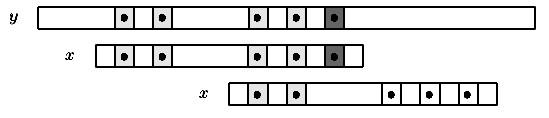

In [8]:
Image('img/nohole.jpg')

En este caso hay un mismatch en un 'no hueco'. En esta situación, no es necesario comparar los dos primeros
'no huecos' del patrón luego del desplazamiento

## Segunda fase

En esta segunda fase, el procedimiento es similar al previo pero con 'huecos' (y por lo tanto usamos Rmin en lugar de (Kmin).

Como los 'huecos' se comparan de derecha a izquierda, sabemos que el sufijo que coincidió al final se repetirá
a partir de la posición 0 del patrón hasta la posición m - Rmin - 1 (pues eso es lo que indica Rmin) y por
lo tanto se empieza desde allí.

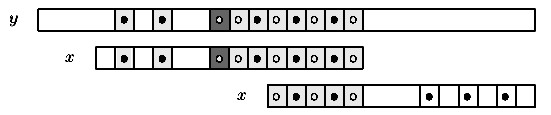

In [9]:
Image('img/hole.jpg')

En este caso, luego del shift, no hace falta comparar el prefijo que coincidió.

# Encontrando matches

Los dos casos en los que devolvemos un match de P en T son:
    
1. i = m --> Arrancamos de i=0 y llegamos al final sin errores.
2. j + m - 1 = j + h[i] --> Este es el caso en el que la comparación no empieza desde el inicio de P gracias
   a algún dato del preprocessing y h[i] = m-1, es decir, llegamos al final de las comparaciones

# Naive vs MP vs KMP vs Colussi

In [11]:
data = pd.read_csv('results_colussi.csv')

## Pruebas con archivos de ADN

En este caso, el alfabeto es de sólo 4 letras: a, g, c, t

In [12]:
dna = data[data['File Type'].str.contains('DNA')]

## Archivo pequeño

In [14]:
dna_small = dna[dna['Text Size'].str.contains('1.6kb')]

#### Buscamos un patron de 8 caracteres en un archivo de 1.6kb

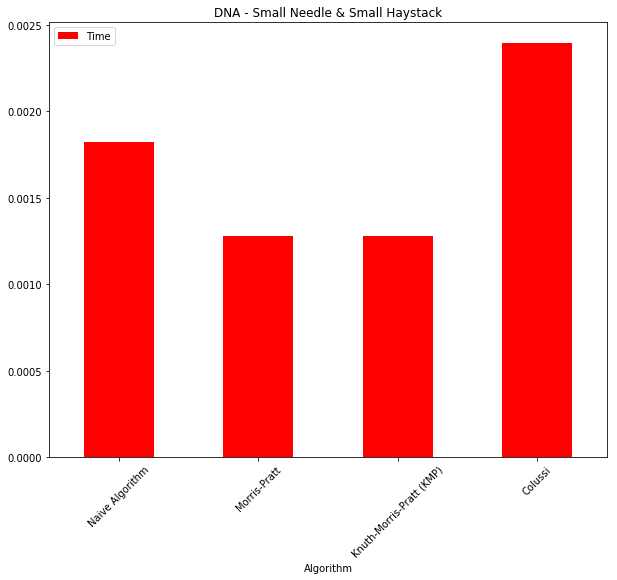

In [15]:
dna_small[dna_small['Pattern Size'] == 8].plot(kind = 'bar', y = 'Time', x = 'Algorithm',\
                                               rot = 45, figsize = (10, 8), color = 'r', \
                                               title = "DNA - Small Needle & Small Haystack")
plt.show()

#### Buscamos un patrón de 1kb en un archivo de 1.6kb

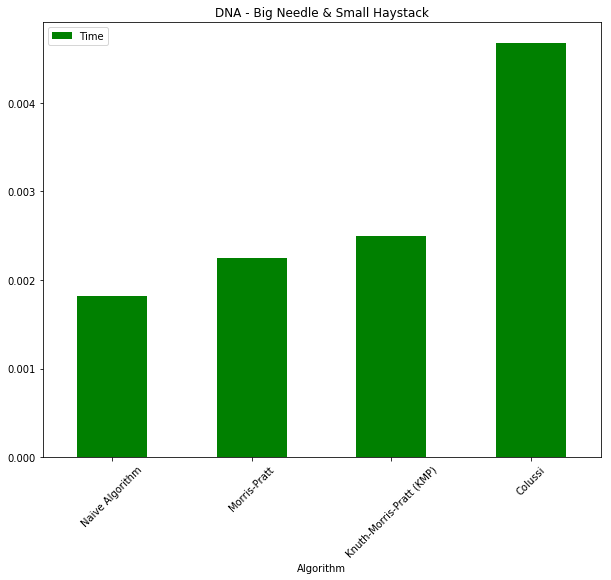

In [16]:
dna_small[dna_small['Pattern Size'] == 1024].plot(kind = 'bar', y = 'Time', x = 'Algorithm',\
                                               rot = 45, figsize = (10, 8), color = 'g',\
                                               title = "DNA - Big Needle & Small Haystack")
plt.show()

### Archivo de tamaño mediano

#### Buscamos un patrón de tamaño 8 en un archivo de 180.4kb

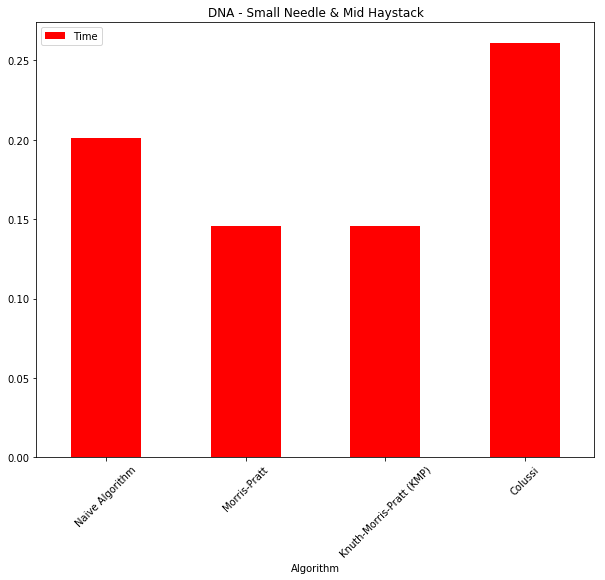

In [17]:
dna_mid = dna[dna['Text Size'].str.contains('180.4kb')]
dna_mid[dna_mid['Pattern Size'] == 8].plot(kind = 'bar', y = 'Time', x = 'Algorithm',\
                                               rot = 45, figsize = (10, 8), color = 'r',\
                                               title = "DNA - Small Needle & Mid Haystack")
plt.show()

#### Buscamos un patrón de tamaño 1kb en un archivo de 180.4kb

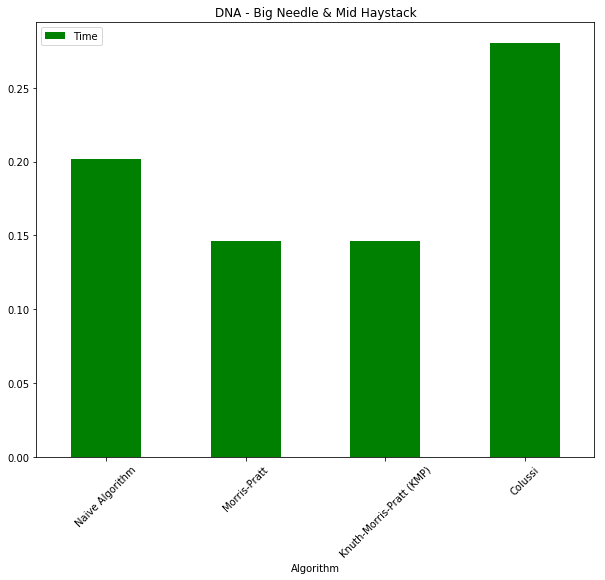

In [18]:
dna_mid[dna_mid['Pattern Size'] == 1024].plot(kind = 'bar', y = 'Time', x = 'Algorithm',\
                                               rot = 45, figsize = (10, 8), color = 'g',\
                                               title = "DNA - Big Needle & Mid Haystack")
plt.show()

### Archivo de tamaño grande

#### Buscamos un patrón de tamaño 8 en un archivo de 4.6Mb

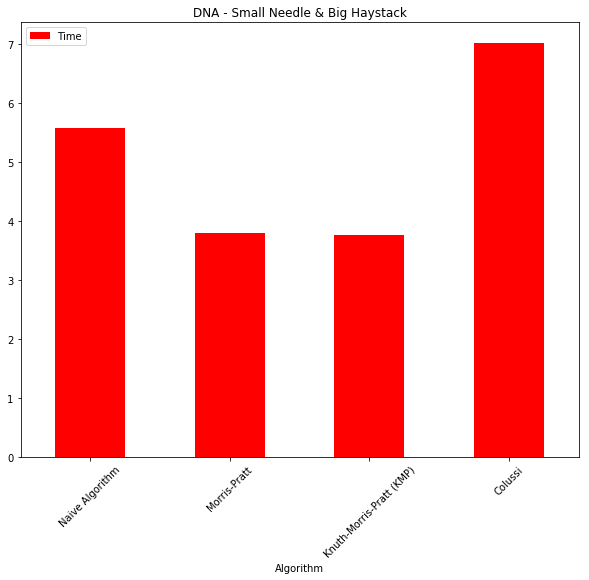

In [19]:
dna_big = dna[dna['Text Size'].str.contains('4.6Mb')]
dna_big[dna_big['Pattern Size'] == 8].plot(kind = 'bar', y = 'Time', x = 'Algorithm',\
                                               rot = 45, figsize = (10, 8), color = 'r',\
                                               title = "DNA - Small Needle & Big Haystack")
plt.show()

#### Buscamos un patrón de tamaño 1kb en un archivo de 4.6Mb

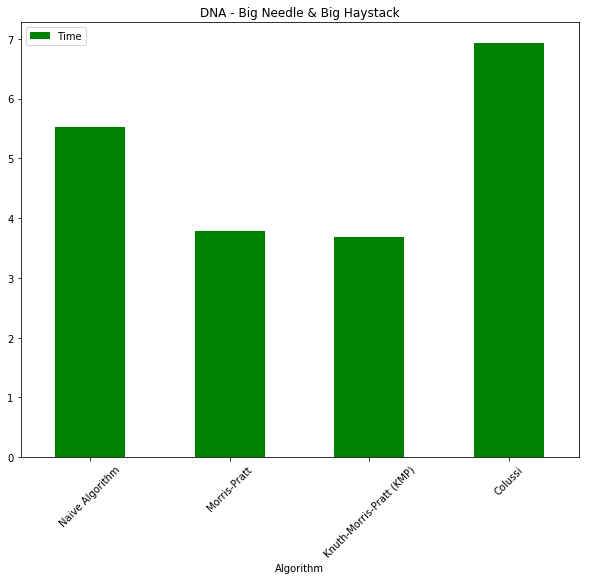

In [20]:
dna_big[dna_big['Pattern Size'] == 1024].plot(kind = 'bar', y = 'Time', x = 'Algorithm',\
                                               rot = 45, figsize = (10, 8), color = 'g',\
                                               title = "DNA - Big Needle & Big Haystack")
plt.show()

## Pruebas con archivos de texto en Inglés
En este caso, el alfabeto es mucho más grande, pues incluye todos los caracteres del idioma inglés.

In [21]:
english = data[data['File Type'].str.contains('English')]

### Archivo pequeño

In [22]:
english_small = english[english['Text Size'].str.contains('1.2kb')]

#### Buscamos un patron de 3 caracteres en un archivo de 1.2kb

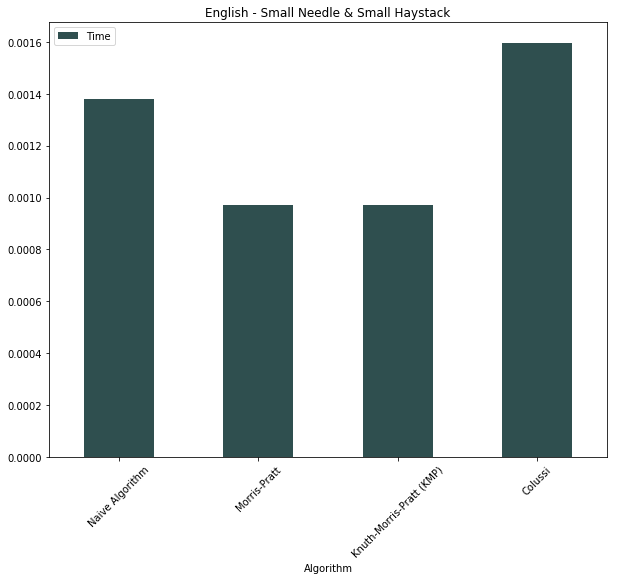

In [23]:
english_small[english_small['Pattern Size'] == 3].plot(kind = 'bar', y = 'Time', x = 'Algorithm',\
                                               rot = 45, figsize = (10, 8), color = 'darkslategray', \
                                               title = "English - Small Needle & Small Haystack")
plt.show()

#### Buscamos un patrón de 170 caracteres en un archivo de 1.2kb

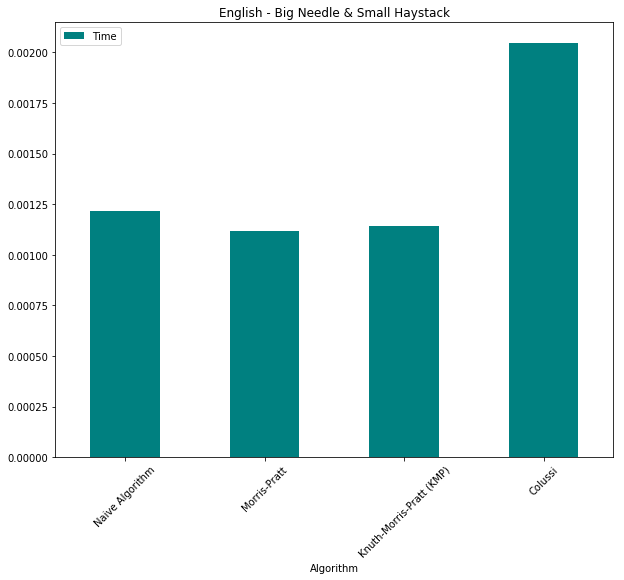

In [24]:
english_small[english_small['Pattern Size'] == 170].plot(kind = 'bar', y = 'Time', x = 'Algorithm',\
                                               rot = 45, figsize = (10, 8), color = 'teal',\
                                               title = "English - Big Needle & Small Haystack")
plt.show()

### Archivo grande

In [25]:
english_big = english[english['Text Size'].str.contains('4Mb')]

#### Buscamos un patron de 3 caracteres en un archivo de 4Mb

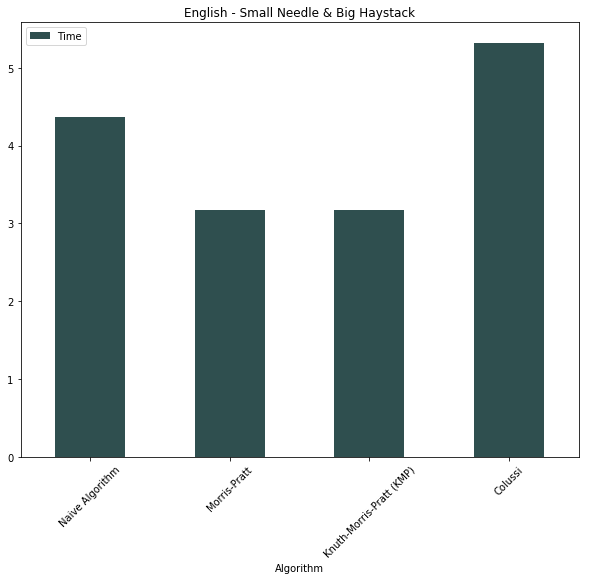

In [26]:
english_big[english_big['Pattern Size'] == 3].plot(kind = 'bar', y = 'Time', x = 'Algorithm',\
                                               rot = 45, figsize = (10, 8), color = 'darkslategray', \
                                               title = "English - Small Needle & Big Haystack")
plt.show()

#### Buscamos un patrón de 170 caracteres en un archivo de 4Mb

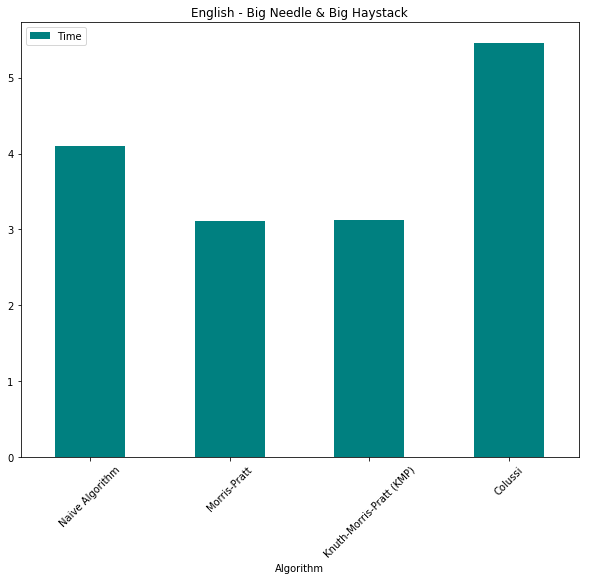

In [27]:
english_big[english_big['Pattern Size'] == 170].plot(kind = 'bar', y = 'Time', x = 'Algorithm',\
                                               rot = 45, figsize = (10, 8), color = 'teal',\
                                               title = "English - Big Needle & Big Haystack")
plt.show()